# Titanic - Machine Learning from Disaster Competition
Gary Lawson


2019-01-10 - Import data and begin EDA

In [21]:
import pandas as pd # dataframes     
import numpy as np  # arrays and math functions
%matplotlib inline
import matplotlib.pyplot as plt  # static plotting

In [56]:
# Simple import of csv data for train and test.
path = 'C:/Users/glawson/Documents/Masters in Predictive Analytics/MSDS 422 - Practical Machine Learning/Hands-On ML Examples/Kaggle_Titanic'
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

# Change column names to lower case.
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]

In [57]:
# Take a look at the first few lines of data.
train.head()

# It looks like we have 12 features (or columns) in the data set.  

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Look at the feature names (or column names) for the data set.
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [59]:
# Look at the data type of each feature, as well as whether there are any null values.
train.info()

# It looks like there are 891 total records in the training data set.  The features of Age, Cabin, 
# and Embarked have missing values.  Name, Sex, Ticket, Cabin, and Embarked are all objects and 
# remaining features are a numerical value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [60]:
# Look at what values exist for each of the features with an object data type (except name,
# as one would expect each of these to be unique).
print(train['sex'].value_counts())
print(train['ticket'].value_counts())
print(train['cabin'].value_counts())
print(train['embarked'].value_counts())

male      577
female    314
Name: sex, dtype: int64
CA. 2343             7
347082               7
1601                 7
3101295              6
CA 2144              6
347088               6
S.O.C. 14879         5
382652               5
2666                 4
17421                4
PC 17757             4
LINE                 4
W./C. 6608           4
113760               4
349909               4
4133                 4
347077               4
19950                4
113781               4
363291               3
248727               3
C.A. 31921           3
347742               3
SC/Paris 2123        3
110413               3
35273                3
29106                3
13502                3
F.C.C. 13529         3
230080               3
                    ..
SOTON/O2 3101287     1
W./C. 14258          1
28134                1
113514               1
347063               1
350417               1
244358               1
211536               1
343276               1
C.A. 24579           1
34706

In [61]:
# Run some summary statistics on the numerical values.
train.describe()

# Insights:
# Passagnerid - Appears to be a straight count from 1 to 891.
# Survived - This appears to be a binary code.  Data dictionary indicates 0 = No, 1 = Yes.
    # From the average, it appears only 38% of the people on the ship survived.
# Class - This appears to be a binary code.  Data dictionary indicates 1 = 1st, 2 = 2nd,
    # 3 = 3rd.  It looks like >= 50% of the passangers were in 3rd class, with less than
    # 25% in 1st class.
# Age - The min age says 0.42, which seems odd.  The max age was 80.  The average passager
    # is reported as about 30 years old, with 75% of the passangeers being 38 or less.
# Sibsp - This is the number of siblings or spouses aboard.  Min is zero, max is 8.  It
    # appears that only 25% of the passangers had siblings or spouses aboard.
# Parch - Number of parents and children.  Most passangers did not have parents or siblings
    # aboard.
# Fare - Fares ranged from 0 to 512.  The zero may be concerning.  The top 25% of fares
    # appears to be skewing the data.

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
# Take a look at how many ages are below zero
print('Passangers with age less than 1: ', len(train[train['age']<1]))
train[train['age']<1]

# This may be correct, as they do all have the parch feature of >1 as well, meaning they 
# could be children under 1.

Passangers with age less than 1:  7


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [83]:
# Take a look at how many ages are below zero
print('Passangers with age less than 1: ', len(train[train['age']<10]))
train[train['age']<10]

# This may be correct, as they do all have the parch feature of >1 as well, meaning they 
# could be children under 1.

Passangers with age less than 1:  62


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S


In [63]:
# Take a look at how many fares are below zero
print('Passangers with fare equal to 0: ', len(train[train['fare']==0]))
train[train['fare']<1]

# These data points are questionable.  12 of these records are also missing the cabin.  This
# may mean that either the record is incomplete as the researcher could not completely account
# for these passangers, or maybe they were non-paying customers and had no cabin because
# they snuck on board.  It is interesting that they do all have a class, however.

Passangers with fare equal to 0:  15


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023163C23978>,
      dtype=object)

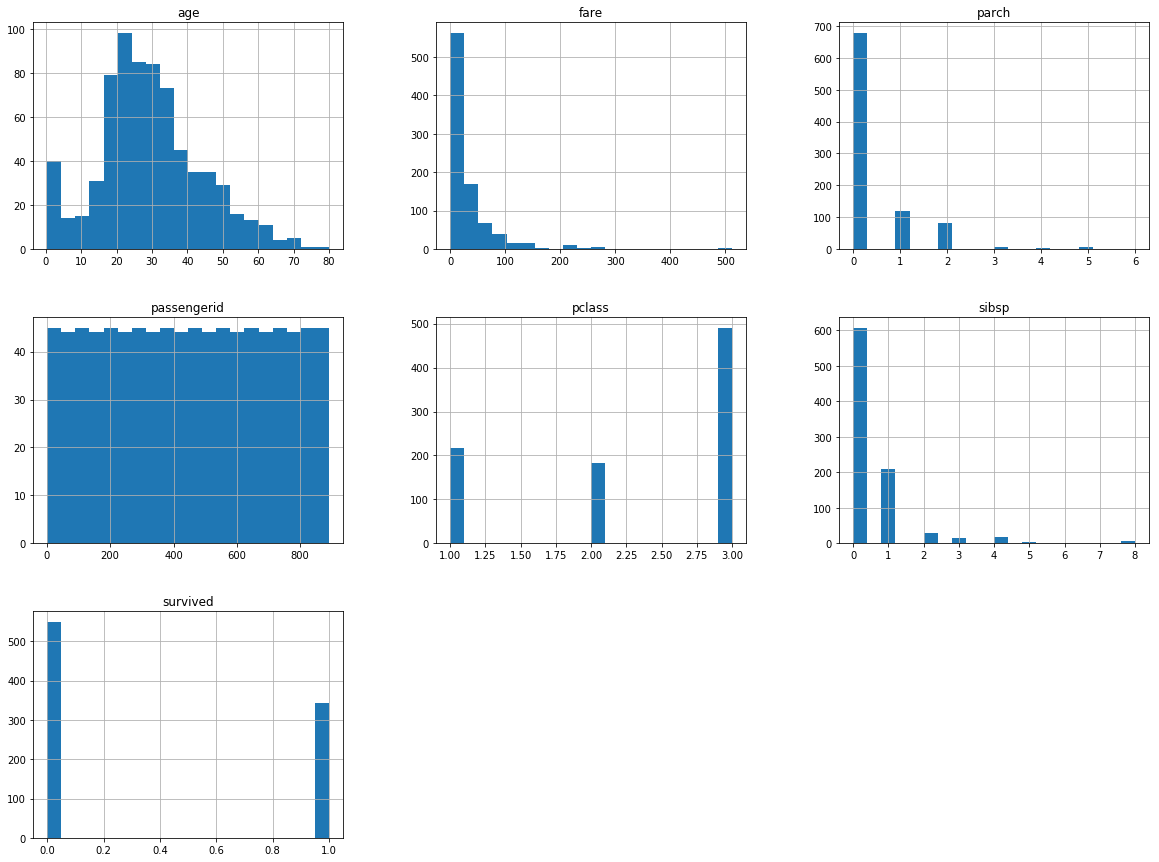

In [64]:
train.hist(bins=20, figsize=(20,15))

# Note that only the numerical values graphed here.

In [65]:
# Create a copy of the train data set
train_num = train.copy()
# Create polynomial variables for object type categories so they can be plotted.


sex_cat, sex_categories = train_num['sex'].factorize()
print(sex_categories)
train_num['sex_cat'] = pd.DataFrame(sex_cat)

ticket_cat, ticket_categories = train_num['ticket'].factorize()
print(ticket_categories)
train_num['ticket_cat'] = pd.DataFrame(ticket_cat)

cabin_cat, cabin_categories = train_num['cabin'].factorize()
print(cabin_categories)
train_num['cabin_cat'] = pd.DataFrame(cabin_cat)

embarked_cat, embarked_categories = train_num['embarked'].factorize()
print(embarked_categories)
train_num['embarked_cat'] = pd.DataFrame(embarked_cat)

Index(['male', 'female'], dtype='object')
Index(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736',
       ...
       '349212', '349217', '349257', '7552', 'C.A./SOTON 34068',
       'SOTON/OQ 392076', '211536', '112053', '111369', '370376'],
      dtype='object', length=681)
Index(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78',
       'D33',
       ...
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42', 'C148'],
      dtype='object', length=147)
Index(['S', 'C', 'Q'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023163E2F5F8>,
      dtype=object)

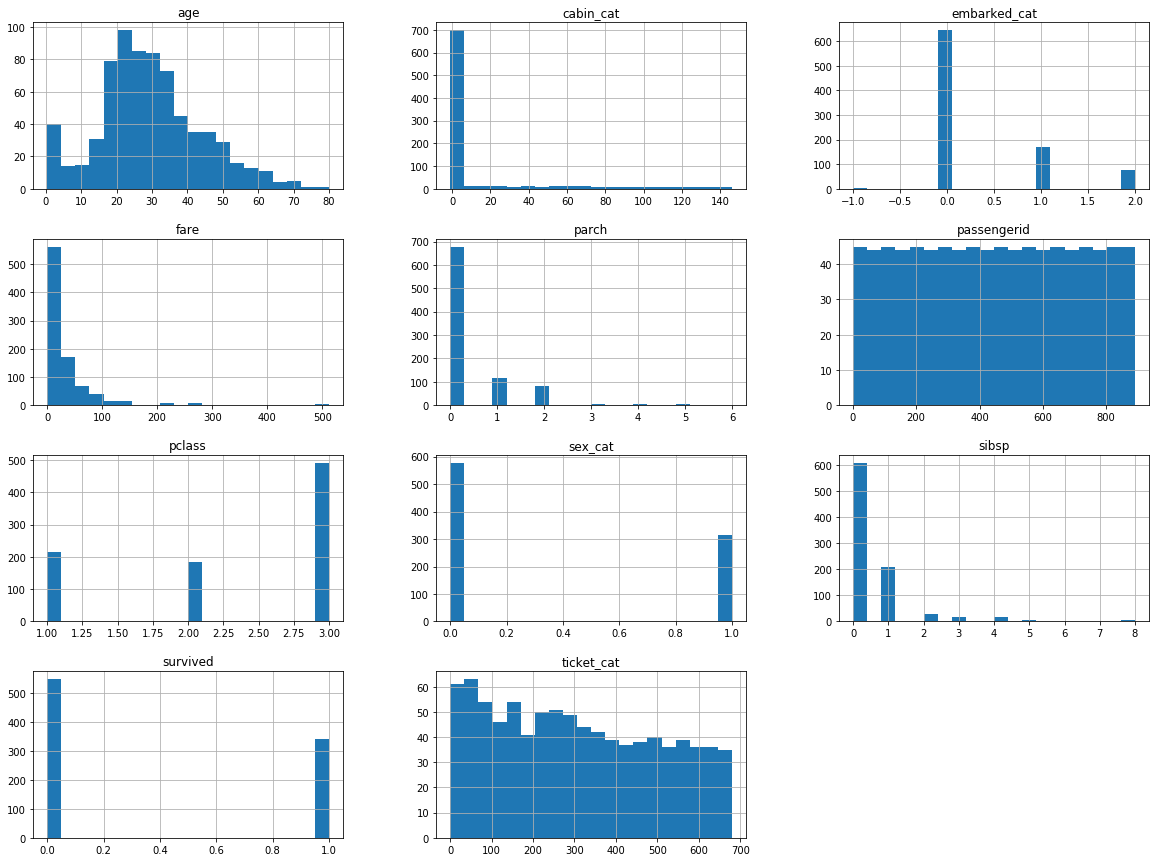

In [66]:
train_num.hist(bins=20, figsize=(20,15))

# Note that cabin and ticket still don't plot, as these may be to specific to each record.

In [77]:
int(max(train['age']))

80

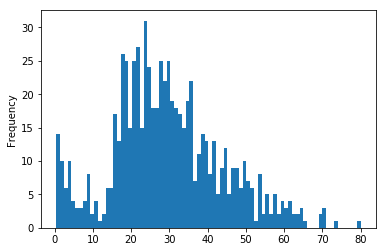

In [79]:
# Look specifically at age
train['age'].plot(kind='hist', bins=int(max(train['age'])))
plt.savefig(path + '/age_hist.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231658882B0>,
      dtype=object)

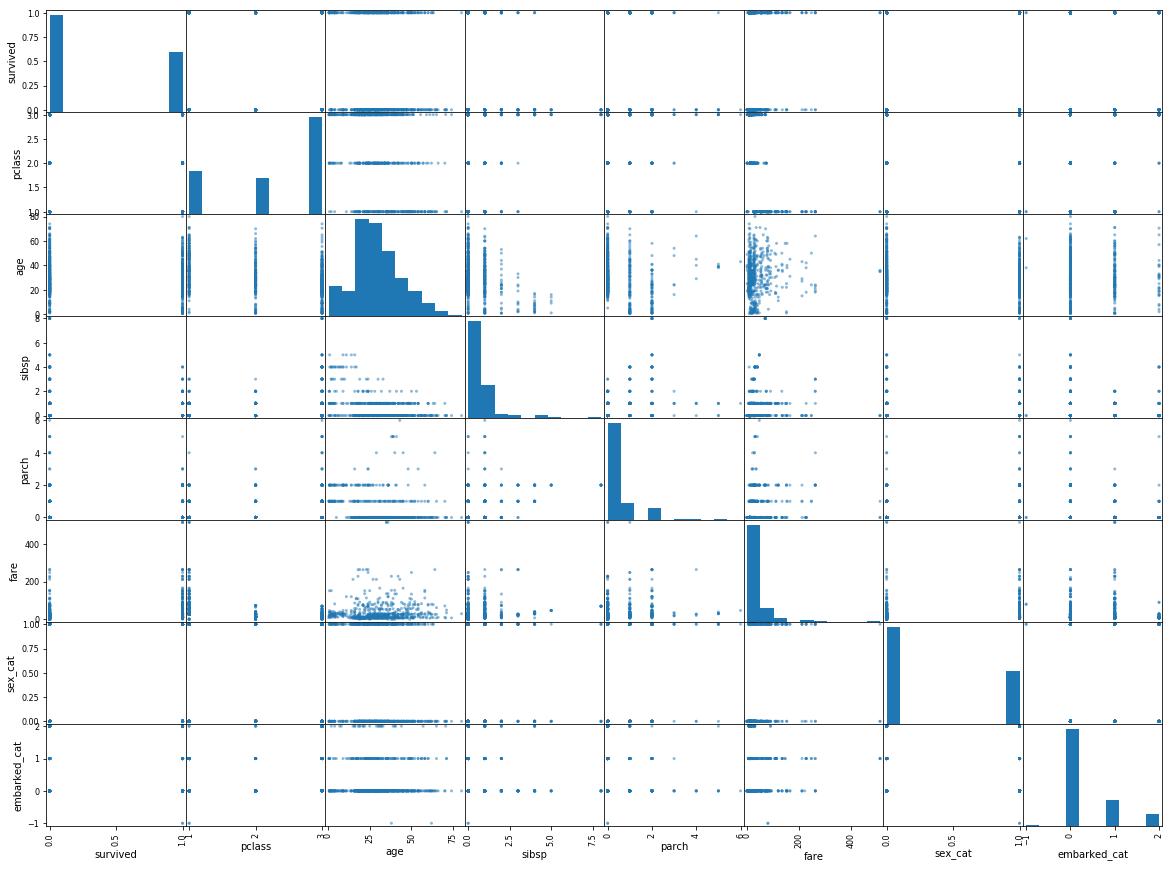

In [68]:
# Look to see if there are any visual correlations between features with some 
# promise of being indicators.
from pandas.plotting import scatter_matrix

attributes = ['survived', 'pclass', 'age', 'sibsp',
       'parch', 'fare', 'sex_cat', 'embarked_cat']
train_num.columns
scatter_matrix(train_num[attributes], figsize=(20,15))

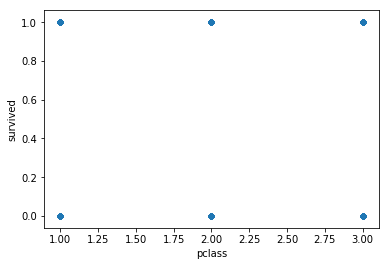

In [81]:
train_num.plot(kind='scatter', x='pclass', y='survived')
plt.savefig(path + '/pclass_scatter.png')

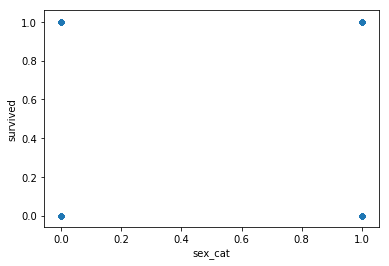

In [82]:
train_num.plot(kind='scatter', x='sex_cat', y='survived')
plt.savefig(path + '/sex_scatter.png')